In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
idx = pd.IndexSlice

In [2]:
pits = pd.read_pickle('data/96/merge_pits')
pits

Pit                          Pitstop reason Tyres condition  \
10 0   Stop 1 (Lap 3)  Tyres change due to the weather change             86%   
   1  Stop 2 (Lap 22)                   No more fuel was left             34%   
   2  Stop 3 (Lap 35)                   No more fuel was left             54%   
   3  Stop 4 (Lap 48)                   No more fuel was left             53%   
11 0   Stop 1 (Lap 3)  Tyres change due to the weather change             84%   
   1  Stop 2 (Lap 28)                   No more fuel was left             41%   
   2  Stop 3 (Lap 54)                   No more fuel was left             38%   

     Fuel left Refilled to Pit time  
10 0       49%   No refill  34.035s  
   1        2%   60 liters  21.711s  
   2        0%   60 liters  26.025s  
   3        0%   60 liters  25.337s  
11 0       37%   75 liters  36.748s  
   1        1%   75 liters  25.267s  
   2        0%   75 liters  27.122s

In [3]:
pits['Pit'] = pd.to_numeric(pits['Pit'].str.split().str[-1].str[:-1])
pits['Tyres condition'] = pd.to_numeric(pits['Tyres condition'].str[:-1])/100
pits['Fuel left'] = pd.to_numeric(pits['Fuel left'].str[:-1])/100
pits['Pit time'] = pd.to_numeric(pits['Pit time'].str[:-1])
pits['Refilled to'] = pd.to_numeric(pits['Refilled to'].str.split().str[0], 'coerce').fillna(pits['Fuel left']*180)
pits

Pit                          Pitstop reason  Tyres condition  Fuel left  \
10 0    3  Tyres change due to the weather change               86         49   
   1   22                   No more fuel was left               34          2   
   2   35                   No more fuel was left               54          0   
   3   48                   No more fuel was left               53          0   
11 0    3  Tyres change due to the weather change               84         37   
   1   28                   No more fuel was left               41          1   
   2   54                   No more fuel was left               38          0   

      Refilled to  Pit time  
10 0         88.2    34.035  
   1         60.0    21.711  
   2         60.0    26.025  
   3         60.0    25.337  
11 0         75.0    36.748  
   1         75.0    25.267  
   2         75.0    27.122

In [4]:
pits['Delta'] = pits['Pit'].diff()
pits.loc[idx[:, 0], 'Delta'] = pits.loc[idx[:, 0], 'Pit']
pits

Pit                          Pitstop reason  Tyres condition  Fuel left  \
10 0    3  Tyres change due to the weather change               86         49   
   1   22                   No more fuel was left               34          2   
   2   35                   No more fuel was left               54          0   
   3   48                   No more fuel was left               53          0   
11 0    3  Tyres change due to the weather change               84         37   
   1   28                   No more fuel was left               41          1   
   2   54                   No more fuel was left               38          0   

      Refilled to  Pit time  Delta  
10 0         88.2    34.035    3.0  
   1         60.0    21.711   19.0  
   2         60.0    26.025   13.0  
   3         60.0    25.337   13.0  
11 0         75.0    36.748    3.0  
   1         75.0    25.267   25.0  
   2         75.0    27.122   26.0

In [5]:
mt, bt = np.polyfit(pits['Delta'], pits['Tyres condition'], 1)
mf, bf = np.polyfit(pits['Delta'], pits['Fuel left'], 1)
print('% Tyre lost per lap', round(mt, 2))
print('% Fuel lost per lap', round(mf, 2))

% Tyre lost per lap -2.11
% Fuel lost per lap -1.84


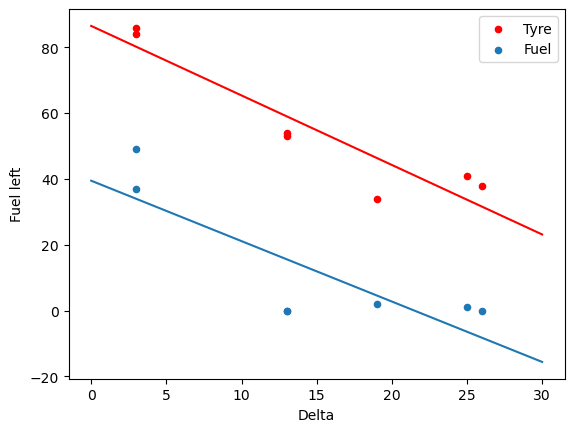

In [6]:
ax = pits.plot(x = 'Delta', y = 'Tyres condition', kind = 'scatter', label = 'Tyre', color = 'red')
pits.plot(x = 'Delta', y = 'Fuel left', kind = 'scatter', label = 'Fuel', ax = ax)
plt.plot([0, 30], [bt, bt + mt*30], color = 'red')
plt.plot([0, 30], [bf, bf + mf*30])